In [21]:
import sys; sys.path.append("../../")
from DataPreprocessing.DataPreprocessing import *
from DataExploration import *
import matplotlib.pyplot as plt
import seaborn as sns



# Question:
    Does the name of the publisher have a role in increasing the sales?



## 1- Expectations: 
    Yes, publisher name can affect video game sales. According to a study by CAUSEweb, publisher name is one of the factors that impact video game sales1. Publishers help developers navigate the business of game development by offering various services such as public relations and marketing, negotiating with platform holders, and administrative work

## 2- Data Collection: 
    

## Read data 

In [16]:
df = read_data(kind='dataset')


## Handle Missing Values

In [17]:
df =handle_missing_values(df)

Total Number of rows : 16719
Number of rows with missing values: 9894
Number of rows after dropping: 6825


In [18]:
#get mean of global sales for each publisher
publisher_sales = df.groupby('Publisher')['Global_Sales'].mean()
print(publisher_sales)

Publisher
10TACLE Studios         0.020000
1C Company              0.030000
2D Boy                  0.040000
3DO                     0.165333
505 Games               0.396375
                          ...   
Zoo Games               0.446667
Zushi Games             0.210000
bitComposer Games       0.030000
id Software             0.030000
inXile Entertainment    0.100000
Name: Global_Sales, Length: 262, dtype: float64


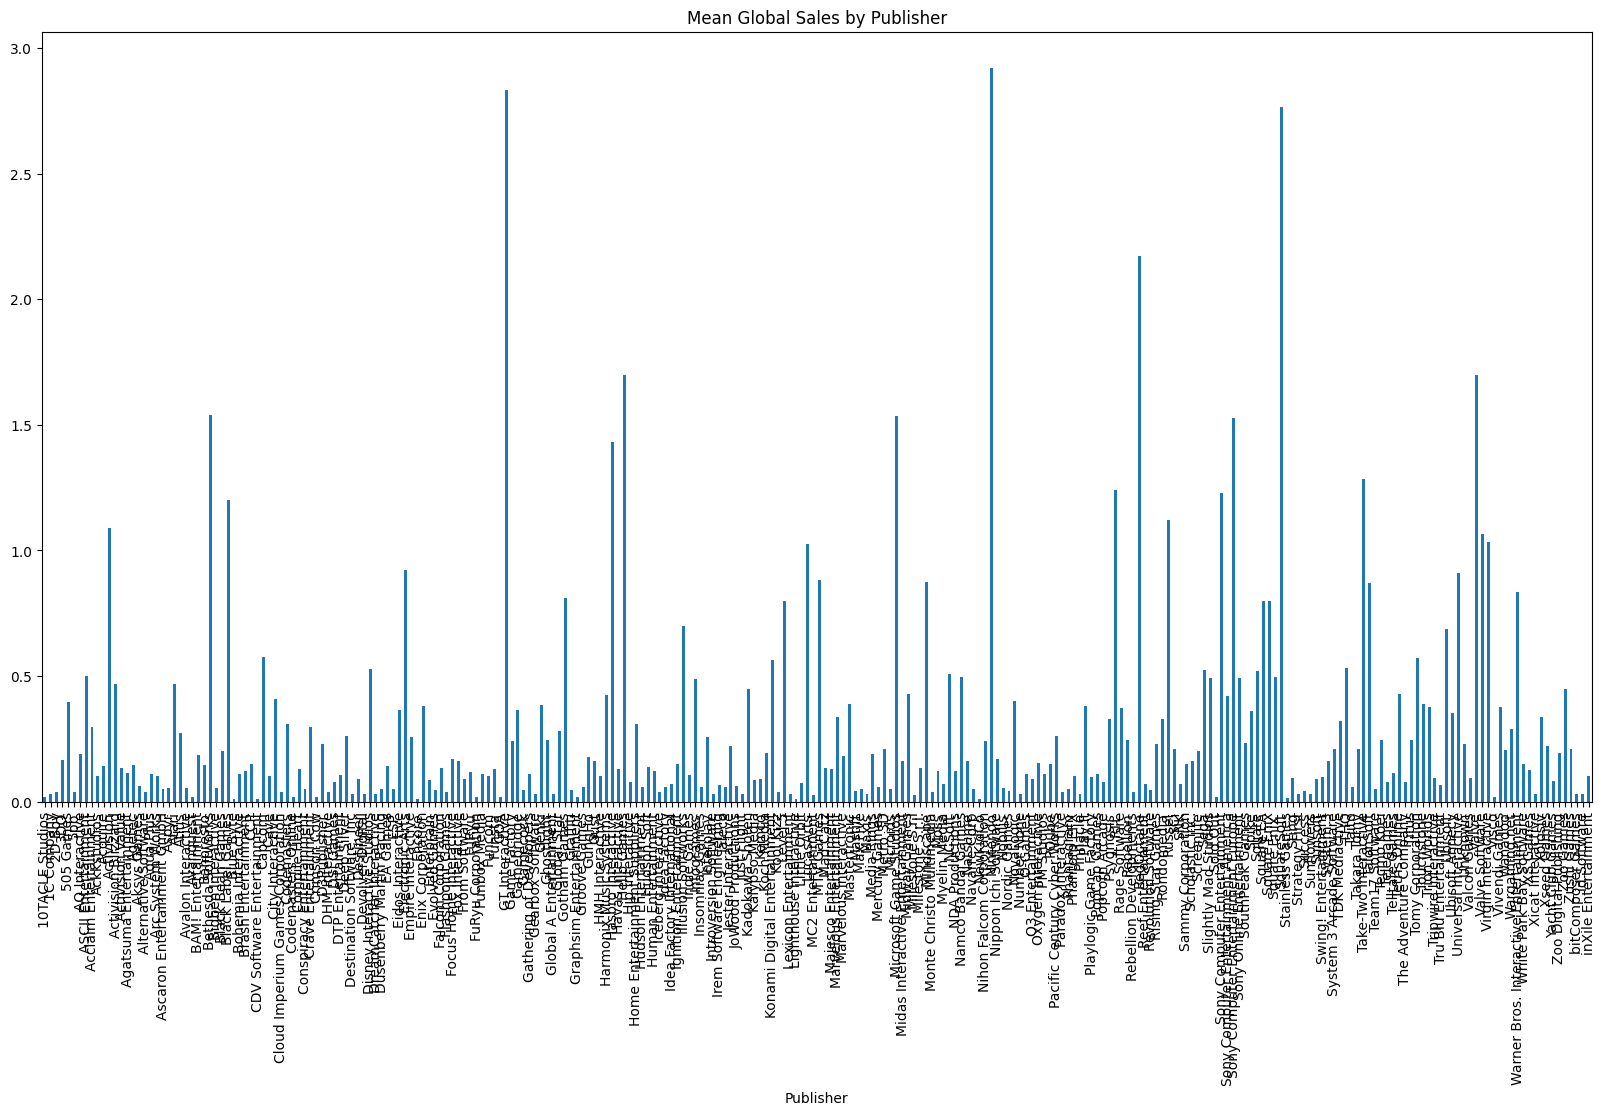

' from the plot we can see that there is a significant difference between the mean \nglobal sales of games for each publisher.'

In [19]:
# plot publisher sales 
publisher_sales.plot(kind='bar', figsize=(20, 10), title='Mean Global Sales by Publisher')
plt.show()

<Axes: title={'center': 'Mean Global Sales by Publisher'}, xlabel='Publisher'>

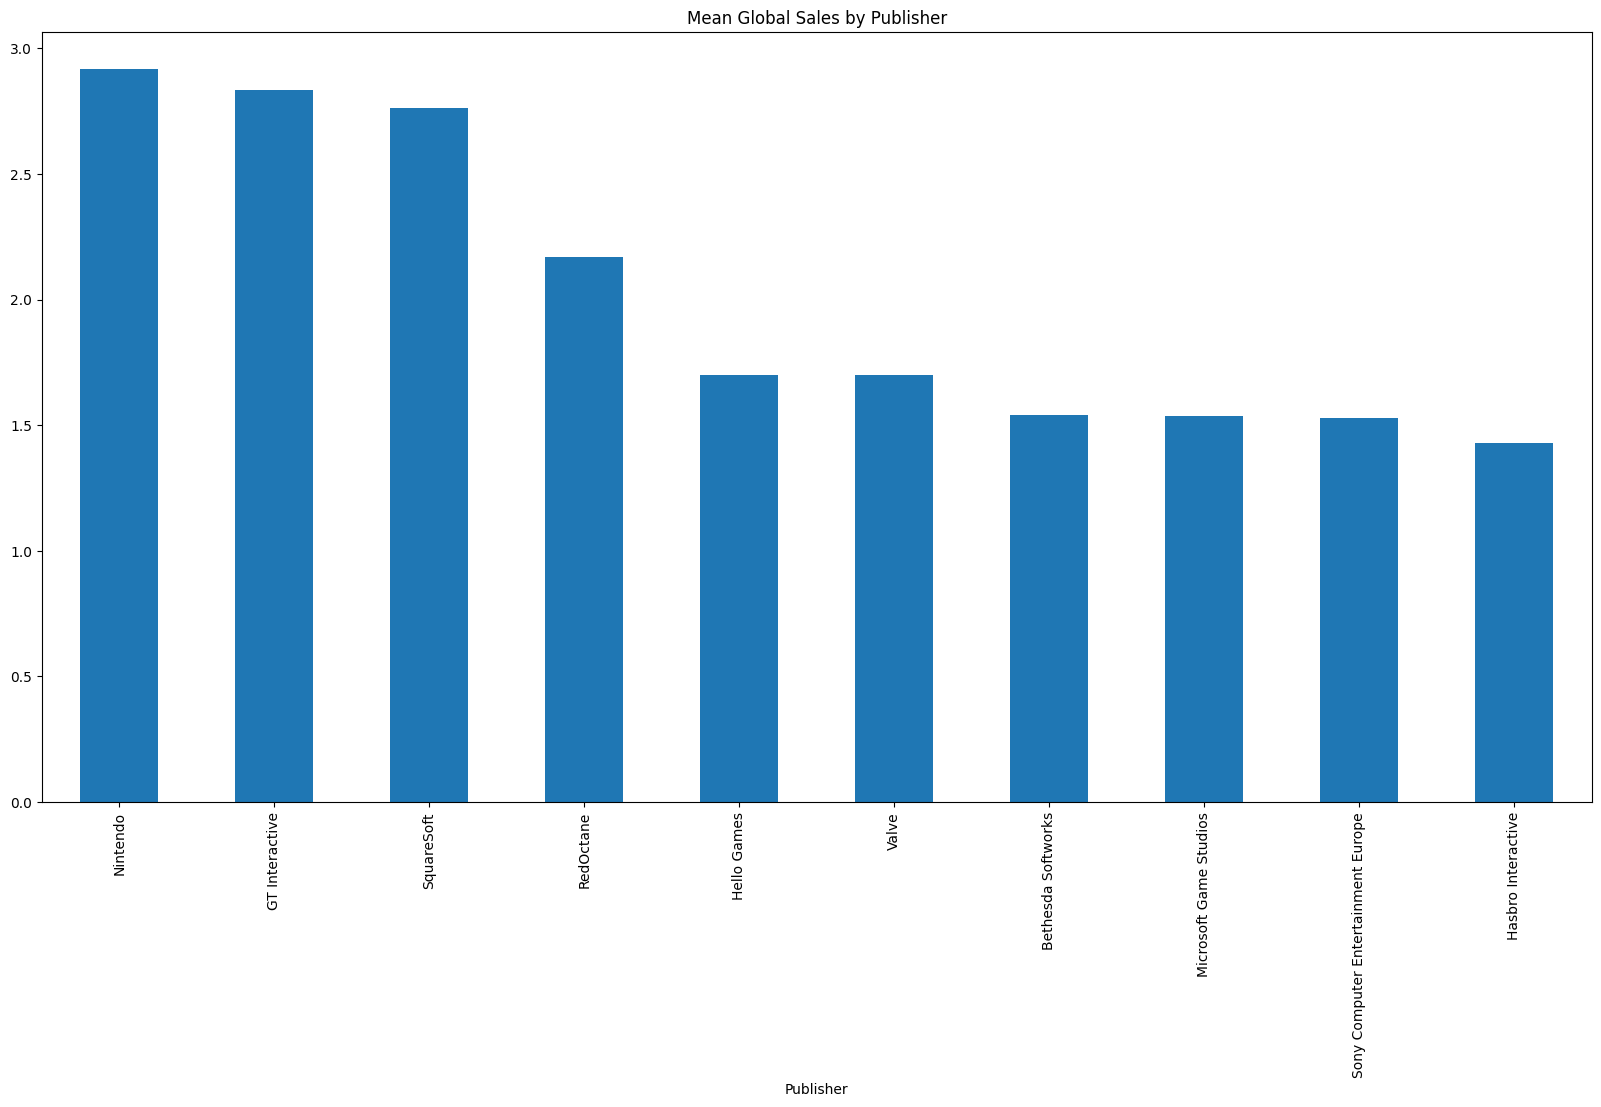

In [20]:
# plot top 10 publishers
publisher_sales.nlargest(10).plot(kind='bar', figsize=(20, 10), title='Mean Global Sales by Publisher')

## 3- Comparing Expectations to data:
        from the plot we can see that there is a significant difference between
        the mean global sales of games for each publisher.
        So Expectations match data.
